## 檔案讀取查詢
### 作業1 輸入郵遞區號查地址

In [ ]:
import csv
inValue = input("請輸入郵遞區號:")
with open("HW16__Data.csv",'r',encoding="utf-8") as data:
    csvList = csv.reader(data)
    for data in csvList :
        if data[2] == inValue:
           print(data)

## 作業：開啟檔案計算各種資訊
+ 請開啟 HW15__Data.csv，開啟時加入參數 usecols=(x, y) ，代表使用 index=x 與 index=y 的 column。
請列出收盤價與成交量。
+ 加權平均代表以成交量作為權重。

In [1]:
import numpy as np
x,y=np.loadtxt('HW15__Data.csv',delimiter=',',skiprows=1,usecols=(4,5),unpack=True)
print("收盤價：",x)
print('------')
print("成交量:",y)
print("收盤價最大值",np.max(x))
print("收盤價最小值",np.min(x))
print("收盤價平均數",np.mean(x))
print("收盤價中位數",np.median(x))
print("收盤價加權平均",np.average(x,weights=y))

收盤價： [104.08 110.26  96.8  ...  26.87  26.37  26.5 ]
------
成交量: [70749800. 54967000. 79260700. ...  5444000.  2346400.  2981600.]
收盤價最大值 199.83
收盤價最小值 12.94
收盤價平均數 46.79861864824865
收盤價中位數 38.13
收盤價加權平均 63.11373661448603


## 重複值偵測
+ 可利用 duplicated( ) 方法檢查 dataframe 內的 row 是否有完整重複值資料。
+ 若 duplicated( ) 方法內加入欄位名稱代表檢查某欄位是否有重複資料。
+ drop_duplicates( ) 方法將會丟棄重複值：
  + 預設保留第一個。
  + 若加入 keep=‘first’ 將得到相同結果。
  + 若加入 keep=‘last’ 將保留最後一個。
  + 若加入 keep=False 代表不保留。
+ 站在 row 的角度，若有多個重複的資料，那 row 也會執行多個重複值的檢查與刪除。
+ 站在 column 角度，若要進行重複值的檢查與刪除，必須告訴他column 名稱，若是兩個欄位以上，請加入 subset=[‘欄位1’,‘欄位2’]。


In [2]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D
2,3,5,5
5,5,5,5
5,5,5,5
13,23,5,5
'''
df=pd.read_csv(StringIO(csv_data))
print(df)
print("------0----")
print(df.duplicated()) #因為index 2的row 5 5 5 與 index 1的row 5 5 5 一模一樣所以重複
print("-------1---------")
print(df.duplicated('A')) # 單獨查A欄的數值是否重複
print("-------2---------")
print(df.duplicated('D'))
print("-------3---------")

    A   B  C  D
0   2   3  5  5
1   5   5  5  5
2   5   5  5  5
3  13  23  5  5
------0----
0    False
1    False
2     True
3    False
dtype: bool
-------1---------
0    False
1    False
2     True
3    False
dtype: bool
-------2---------
0    False
1     True
2     True
3     True
dtype: bool
-------3---------


### 丟棄重複值的資料

In [3]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D
2,3,5,5
5,5,5,5
5,5,5,5
13,23,5,5
'''
df=pd.read_csv(StringIO(csv_data))
print(df)
print("==================")
print(df.drop_duplicates())#保留第一個重複的
print("==================")
print(df.drop_duplicates(keep='last')) #保留最後一個重複的
print("==================")
print(df.drop_duplicates(keep=False)) #不保留
print("==================")

    A   B  C  D
0   2   3  5  5
1   5   5  5  5
2   5   5  5  5
3  13  23  5  5
    A   B  C  D
0   2   3  5  5
1   5   5  5  5
3  13  23  5  5
    A   B  C  D
0   2   3  5  5
2   5   5  5  5
3  13  23  5  5
    A   B  C  D
0   2   3  5  5
3  13  23  5  5


In [4]:
# import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D
2,3,5,5
5,5,5,5
5,5,5,5
13,23,5,5
'''
df=pd.read_csv(StringIO(csv_data))
print(df)
print("======")
print(df.drop_duplicates(subset=['C','D'])) #因為C D 重頭到尾都重複 所以 只留index :0的資料
print("======")
print(df.drop_duplicates(subset=['C','D'],keep='last'))#因為C D 重頭到尾都重複 keep 為 last 所以 只留index :3
print("======")
print(df.drop_duplicates(subset=['C','D'],keep=False))#因為C D 重頭到尾都重複 keep 為 False都不留 所以空
print("======")
print(df.drop_duplicates(subset=['A','D'],keep=False))
print("======")
print(df.drop_duplicates(subset=['B']))

    A   B  C  D
0   2   3  5  5
1   5   5  5  5
2   5   5  5  5
3  13  23  5  5
   A  B  C  D
0  2  3  5  5
    A   B  C  D
3  13  23  5  5
Empty DataFrame
Columns: [A, B, C, D]
Index: []
    A   B  C  D
0   2   3  5  5
3  13  23  5  5
    A   B  C  D
0   2   3  5  5
1   5   5  5  5
3  13  23  5  5


## Column 的索引值名稱變更

In [5]:
import pandas as pd
df = pd.DataFrame([[85,59],[25,59],[80,51]],index=['A','B','C'],columns=['Score1','Score2'])
print(df)
df = df.rename(columns={"Score1":"成績1"})
print("==================")
print(df)
df = df.rename(index={"A":"A+"})
print("==================")
print(df)

   Score1  Score2
A      85      59
B      25      59
C      80      51
   成績1  Score2
A   85      59
B   25      59
C   80      51
    成績1  Score2
A+   85      59
B    25      59
C    80      51


## 資料分析轉換
+ Series 的 map 方法可以接受一個函數或含有 map 關係的字典型資訊。
+ 使用 map 是一種實現元素轉換以及其他資訊清理工作的方式。 
+ 可以搭配 Series 或 dict、匿名函數與一般函數作業。

In [6]:
import pandas as pd
s1 = pd.Series(range(10))
s2=s1.map(lambda x:x+10)
s3=s1.map(lambda x:x*-1)
print(s1)
print("--------------")
print(s2)
print("--------------")
print(s3)
print("--------------")

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64
--------------
0    10
1    11
2    12
3    13
4    14
5    15
6    16
7    17
8    18
9    19
dtype: int64
--------------
0    0
1   -1
2   -2
3   -3
4   -4
5   -5
6   -6
7   -7
8   -8
9   -9
dtype: int64
--------------


In [8]:
import pandas as pd
x = pd.Series([1,2,3], index=['one', 'two', 'three'])
y = pd.Series(['foo', 'bar', 'baz'], index=[1,2,3])#可以把index當作key
x1=x.map(y) #y的index對上 x的value 決定要換置的數值 在x內 value是1 index:one 在y內value是foo index是1
# y的index跟 x的value對上了 把x的value換成y的value 
z = {1: 'A', 2: 'B', 3: 'C'}
x2=x.map(z) # dict內容 key為1 對上 x的value為1的正好取代 x　的value變為A
print(x)
print("--------------")
print(y)
print("--------------")
print(x1)
print("--------------")
print(x2)
print("--------------")
print(z)
print("--------------")

one      1
two      2
three    3
dtype: int64
--------------
1    foo
2    bar
3    baz
dtype: object
--------------
one      foo
two      bar
three    baz
dtype: object
--------------
one      A
two      B
three    C
dtype: object
--------------
{1: 'A', 2: 'B', 3: 'C'}
--------------


In [9]:
import pandas as pd
data = pd.DataFrame({'food':['bacon','pulled pork','bacon','Pastrami',
            'Corned beef','Bacon','pastrami','honey ham','nova lox'],
                  'ounces':[4,3,12,6,7.5,8,3,5,6]})
print(data)
print("=========================")
print(type(data['food']))
print("=========================")
meat_to_animal = {
    'bacon':'pig', 'pulled pork':'pig',
    'pastrami':'cow','corned beef':'cow',
    'honey ham':'pig', 'nova lox':'salmon' }
data['animal'] = data['food'].map(str.lower).map(meat_to_animal) # 建立一組新的animal欄位 將修改後的數值寫入
# 假設有一組需求 須建立food 對映 animal的關係
print("=========================")
print(data)

          food  ounces
0        bacon     4.0
1  pulled pork     3.0
2        bacon    12.0
3     Pastrami     6.0
4  Corned beef     7.5
5        Bacon     8.0
6     pastrami     3.0
7    honey ham     5.0
8     nova lox     6.0
<class 'pandas.core.series.Series'>
          food  ounces  animal
0        bacon     4.0     pig
1  pulled pork     3.0     pig
2        bacon    12.0     pig
3     Pastrami     6.0     cow
4  Corned beef     7.5     cow
5        Bacon     8.0     pig
6     pastrami     3.0     cow
7    honey ham     5.0     pig
8     nova lox     6.0  salmon


In [14]:
import pandas as pd
indexdate = pd.date_range('2018-09-25', periods=10)
print("------S1--------")
s1 = pd.Series(list(range(10)), index=indexdate)
s2=s1.index.map(lambda x: x.day) # 改變index為day
s3=s1.index.map(lambda x: x.weekday) # 改變index為星期幾 0是周一
s4=s1.map(lambda x: x+10) # 把value + 10
def f(x):
    if x < 5:
        return True
    else:
        return False
s5=s1.map(f)
s6 = pd.Series(list(range(10)), index=indexdate)
print(s1)
print("-----S2---------")
print(s2)
print("------S3--------")
print(s3)
print("------s4--------")
print(s4)
print("------s5--------")
print(s5)
print("------s6--------")
print(s6)
print("--------------")
s6.index = s2 #將index換成day
print(s6)
print("--------------")

------S1--------
2018-09-25    0
2018-09-26    1
2018-09-27    2
2018-09-28    3
2018-09-29    4
2018-09-30    5
2018-10-01    6
2018-10-02    7
2018-10-03    8
2018-10-04    9
Freq: D, dtype: int64
-----S2---------
Int64Index([25, 26, 27, 28, 29, 30, 1, 2, 3, 4], dtype='int64')
------S3--------
Int64Index([1, 2, 3, 4, 5, 6, 0, 1, 2, 3], dtype='int64')
------s4--------
2018-09-25    10
2018-09-26    11
2018-09-27    12
2018-09-28    13
2018-09-29    14
2018-09-30    15
2018-10-01    16
2018-10-02    17
2018-10-03    18
2018-10-04    19
Freq: D, dtype: int64
------s5--------
2018-09-25     True
2018-09-26     True
2018-09-27     True
2018-09-28     True
2018-09-29     True
2018-09-30    False
2018-10-01    False
2018-10-02    False
2018-10-03    False
2018-10-04    False
Freq: D, dtype: bool
------s6--------
2018-09-25    0
2018-09-26    1
2018-09-27    2
2018-09-28    3
2018-09-29    4
2018-09-30    5
2018-10-01    6
2018-10-02    7
2018-10-03    8
2018-10-04    9
Freq: D, dtype: int64

# 分組
+ 可針對資料進行分組，然後對每組資料進行統計分析。
+ 分組運算過程：split → apply → combine
  + 拆解 split：依據規則進行拆解分組。
  + 應用 apply：每個分組運行計算規則處理。
  + 合併 combine：把每個分組的計算結果合併起來。
+ 可針對資料進行分組，然後對每組資料進行統計分析。
+ 分組運算過程：split → apply → combine
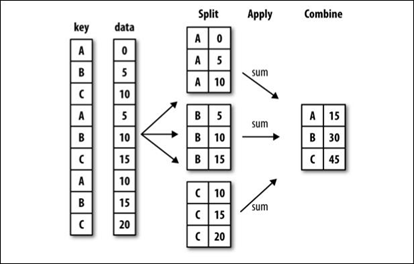
+ 可使用 groupby( ) 進行分組，而這動作並沒有進行實際運算，只是包含分組的資訊。
+ 物體可有多種切割方式：
  + df1.groupby('key')
  + df1.groupby(['key1','key2'])
  + df1.groupby(key,axis=1)

## Apply

In [15]:
import pandas as pd
def test(dataf):
    print(dataf)
data = pd.DataFrame({'food':['bacon','pulled pork','bacon','Pastrami',
            'Corned beef','Bacon','pastrami','honey ham','nova lox'],
                  'ounces':[4,3,12,6,7.5,8,3,5,6]})
print(data)
print("=========================")
data['food-ounces']=data.apply(lambda dataf:f"{dataf['food']}-{dataf['ounces']}",axis=1 )
print("=========================")
print(data)

          food  ounces
0        bacon     4.0
1  pulled pork     3.0
2        bacon    12.0
3     Pastrami     6.0
4  Corned beef     7.5
5        Bacon     8.0
6     pastrami     3.0
7    honey ham     5.0
8     nova lox     6.0
          food  ounces      food-ounces
0        bacon     4.0        bacon-4.0
1  pulled pork     3.0  pulled pork-3.0
2        bacon    12.0       bacon-12.0
3     Pastrami     6.0     Pastrami-6.0
4  Corned beef     7.5  Corned beef-7.5
5        Bacon     8.0        Bacon-8.0
6     pastrami     3.0     pastrami-3.0
7    honey ham     5.0    honey ham-5.0
8     nova lox     6.0     nova lox-6.0


### 群組資料原型

In [16]:
import pandas as pd
import numpy as np
a = {'key1' : ['a', 'b', 'a', 'b', 'a', 'b', 'a', 'a'],
     'key2' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
     'data1': [2,3,4,5,6,7,8,1],
     'data2':[8,1,2,3,5,6,7,6]}
df1 = pd.DataFrame(a)
print(df1)
print("-------------------")

  key1   key2  data1  data2
0    a    one      2      8
1    b    one      3      1
2    a    two      4      2
3    b  three      5      3
4    a    two      6      5
5    b    two      7      6
6    a    one      8      7
7    a  three      1      6
-------------------


### 開始群組

In [17]:
import pandas025
df2=pandas025.df1
print(type(df2.groupby('key1')))
print(type(df2['data1'].groupby(df2['key1'])))
print((df2['data1'].groupby(df2['key1'])))

  key1   key2  data1  data2
0    a    one      2      8
1    b    one      3      1
2    a    two      4      2
3    b  three      5      3
4    a    two      6      5
5    b    two      7      6
6    a    one      8      7
7    a  three      1      6
-------------------
<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'pandas.core.groupby.generic.SeriesGroupBy'>


## 分組後的資料
+ 可針對分組後的資料進行分組計算，例如 mean( )。
+ 分組後將會傳回一組 tuple 資料，包含 group_name 與group_data，就可以做後續的運用。
+ get_group( ) 可得到指定的該組資訊。

In [18]:
import pandas025
df2=pandas025.df1
grouped2 = df2.groupby(['key1', 'key2'])
print("================")
print(grouped2.size( ))
print("================")
grouped3 =df2.groupby(['key2', 'key1']) #先用key2 群組 再用key1群組
print(grouped3.mean( )) #求出群組後的均值
print("================")
print(grouped3.mean( ).unstack()) #row 索引轉到colum
print("================")

key1  key2 
a     one      2
      three    1
      two      2
b     one      1
      three    1
      two      1
dtype: int64
            data1  data2
key2  key1              
one   a       5.0    7.5
      b       3.0    1.0
three a       1.0    6.0
      b       5.0    3.0
two   a       5.0    3.5
      b       7.0    6.0
      data1      data2     
key1      a    b     a    b
key2                       
one     5.0  3.0   7.5  1.0
three   1.0  5.0   6.0  3.0
two     5.0  7.0   3.5  6.0


### stack 與 unstack
+ stack
   + colum index轉為row index
+ unstack
  + row index轉為colum index

In [19]:
import pandas as pd
data = {"A":10,"B":15,"C":18,"D":25}
data2 = {"A":75,"B":83,"C":92,"D":63}
s1 = pd.Series(data)
s2 = pd.Series(data2)
df = pd.DataFrame({"colum1":s1,"colum2":s2},index=pd.Index(["A","B","C","D"],name="rowIndex"))
print(df)
print("============================")
dfs = df.stack()# colum index轉為row index
print(dfs)
print("============================")
print(dfs.unstack())# row index轉為colum index

          colum1  colum2
rowIndex                
A             10      75
B             15      83
C             18      92
D             25      63
rowIndex        
A         colum1    10
          colum2    75
B         colum1    15
          colum2    83
C         colum1    18
          colum2    92
D         colum1    25
          colum2    63
dtype: int64
          colum1  colum2
rowIndex                
A             10      75
B             15      83
C             18      92
D             25      63


## pandas025a的內容

In [20]:
import pandas025
df2=pandas025.df1
print("==========df2=================")
print(df2)
self_def_key = [0, 1, 2, 3, 3, 4, 5, 7]
print("===========================")
print(df2.groupby(self_def_key).size()) #群組自訂的Kye
print("=========key1==================")
print(df2['key1'])
print("==========key2=================")
print(df2['key2'])
print("==========groupby key2 key1=================")
print(df2.groupby([df2['key2'],df2['key1']]).size())
#print(df2.groupby(['key2','key1']).size())print("===========================")
print("============groupby('key1')mean===============")
grouped1 = df2.groupby('key1')
print(grouped1.mean()) #整組Dataframe 都群組key1 求平均值
print("===========================")
grouped2 = df2['data1'].groupby(df2['key1']) #針對data1 groupby key1
print(grouped2.mean())
print("===========================")
print(grouped2.mean()[1])

==========df2=================
  key1   key2  data1  data2
0    a    one      2      8
1    b    one      3      1
2    a    two      4      2
3    b  three      5      3
4    a    two      6      5
5    b    two      7      6
6    a    one      8      7
7    a  three      1      6
0    1
1    1
2    1
3    2
4    1
5    1
7    1
dtype: int64
=========key1==================
0    a
1    b
2    a
3    b
4    a
5    b
6    a
7    a
Name: key1, dtype: object
==========key2=================
0      one
1      one
2      two
3    three
4      two
5      two
6      one
7    three
Name: key2, dtype: object
==========groupby key2 key1=================
key2   key1
one    a       2
       b       1
three  a       1
       b       1
two    a       2
       b       1
dtype: int64
============groupby('key1')mean===============
      data1     data2
key1                 
a       4.2  5.600000
b       5.0  3.333333
key1
a    4.2
b    5.0
Name: data1, dtype: float64
5.0


In [24]:
import pandas025a
print("-------start--------")
#
"""
DataFrameGroupBy 轉成list後可清楚了他是一組list包含了tuple 
tuple內包含group_name 與 group_data
"""
print(list(pandas025a.grouped1)) 
print("---------------")
for group_name, group_data in pandas025a.grouped1: #透過以下方式可分別取出群組資料 grouped1使用key1做群組
    print("group_name:",group_name)
    print(group_data)
print("---------------")    
for group_name, group_data in pandas025a.grouped2: ## data1  使用key做群組
    print("group_name2:",group_name)
    print(group_data)
print("---------------")        

-------start--------
[('a',   key1   key2  data1  data2
0    a    one      2      8
2    a    two      4      2
4    a    two      6      5
6    a    one      8      7
7    a  three      1      6), ('b',   key1   key2  data1  data2
1    b    one      3      1
3    b  three      5      3
5    b    two      7      6)]
---------------
group_name: a
  key1   key2  data1  data2
0    a    one      2      8
2    a    two      4      2
4    a    two      6      5
6    a    one      8      7
7    a  three      1      6
group_name: b
  key1   key2  data1  data2
1    b    one      3      1
3    b  three      5      3
5    b    two      7      6
---------------
group_name2: a
0    2
2    4
4    6
6    8
7    1
Name: data1, dtype: int64
group_name2: b
1    3
3    5
5    7
Name: data1, dtype: int64
---------------


In [25]:
# pandas027資料來源
import pandas as pd
ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
         'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
         'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
         'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
         'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
df = pd.DataFrame(ipl_data)
print(df)
print("--------------------")

      Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
2   Devils     2  2014     863
3   Devils     3  2015     673
4    Kings     3  2014     741
5    kings     4  2015     812
6    Kings     1  2016     756
7    Kings     1  2017     788
8   Riders     2  2016     694
9   Royals     4  2014     701
10  Royals     1  2015     804
11  Riders     2  2017     690
--------------------


In [27]:
import pandas027
grouped = pandas027.df.groupby('Year')
print(type(grouped))
for name,group in grouped:
    print(name)
    print(group)
print("------------------")
print(grouped.get_group(2014))


<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
2014
     Team  Rank  Year  Points
0  Riders     1  2014     876
2  Devils     2  2014     863
4   Kings     3  2014     741
9  Royals     4  2014     701
2015
      Team  Rank  Year  Points
1   Riders     2  2015     789
3   Devils     3  2015     673
5    kings     4  2015     812
10  Royals     1  2015     804
2016
     Team  Rank  Year  Points
6   Kings     1  2016     756
8  Riders     2  2016     694
2017
      Team  Rank  Year  Points
7    Kings     1  2017     788
11  Riders     2  2017     690
------------------
     Team  Rank  Year  Points
0  Riders     1  2014     876
2  Devils     2  2014     863
4   Kings     3  2014     741
9  Royals     4  2014     701


## 資料轉換與設定
+ 分組後的資料可轉為 list 或 dictionary：
  + list( ) 轉換為 list。
  + 轉為 list 之後再以 dict( ) 方法轉為 dictionary。
+ 亦可以透過索引級別設定分組。

In [28]:
import pandas025a
print("-------start---------")
print(list(pandas025a.grouped1)) #list內有一組tuple ('分組kye',DataFrame)
print("--------")
print(dict(list(pandas025a.grouped1)))
print("--------")

-------start---------
[('a',   key1   key2  data1  data2
0    a    one      2      8
2    a    two      4      2
4    a    two      6      5
6    a    one      8      7
7    a  three      1      6), ('b',   key1   key2  data1  data2
1    b    one      3      1
3    b  three      5      3
5    b    two      7      6)]
--------
{'a':   key1   key2  data1  data2
0    a    one      2      8
2    a    two      4      2
4    a    two      6      5
6    a    one      8      7
7    a  three      1      6, 'b':   key1   key2  data1  data2
1    b    one      3      1
3    b  three      5      3
5    b    two      7      6}
--------


### 自訂索引標籤方式分組
+ 當axis=0時，代表每一縱行去做運算
+ 當axis=1時，代表每一橫列去做運算
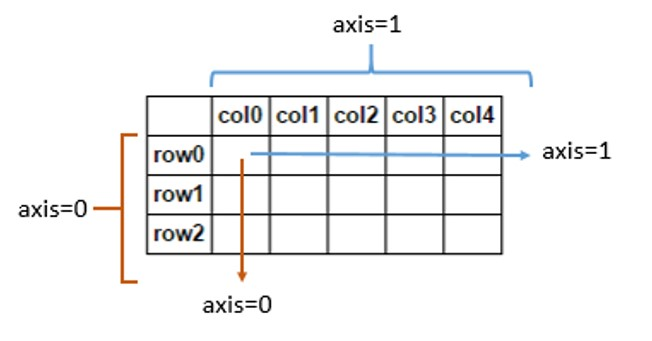

In [29]:
import pandas as pd
import numpy as np
df3 = pd.DataFrame(np.random.randint(1, 10, (5,5)), columns=['a', 'b', 'c', 'd', 'e'], index=['A', 'B', 'C', 'D', 'E'])
df3.iloc()[1, 1:4] = np.NaN
print(df3)
print("-----------------") 
mapping_dict = {'a':'Python', 'b':'Python', 'c':'Java', 'd':'C', 'e':'Java'}
#df3.columns = df3.columns.map(lambda x:mapping_dict[x])
#print("-----------------") 
#print(df3)
print("size")
print(df3.groupby(mapping_dict, axis=1).size())
print("count")
print(df3.groupby(mapping_dict, axis=1).count())
print("sum")
print(df3.groupby(mapping_dict, axis=1).sum())


   a    b    c    d  e
A  4  7.0  3.0  7.0  6
B  9  NaN  NaN  NaN  6
C  2  3.0  6.0  1.0  6
D  8  7.0  2.0  8.0  8
E  7  1.0  4.0  7.0  2
-----------------
size
C         1
Java      2
Python    2
dtype: int64
count
   C  Java  Python
A  1     2       2
B  0     1       1
C  1     2       2
D  1     2       2
E  1     2       2
sum
     C  Java  Python
A  7.0   9.0    11.0
B  0.0   6.0     9.0
C  1.0  12.0     5.0
D  8.0  10.0    15.0
E  7.0   6.0     8.0


### count vs size

In [34]:
df = pd.DataFrame({"Name":["Alice", "Bob", "Mallory", "Mallory", "Bob" , "Mallory"],
                 "City":["Seattle", "Seattle", "Portland", "Seattle", "Seattle", "Portland"],
                "Val":[4,3,3,np.nan,np.nan,4]})
print(df)
print("=======================")
# as_index=False 可使得index為自動流水號
dfg = df.groupby(["Name", "City"],as_index=False).count()#不包含nan 這樣組合且欄位內容存在的幾次
print(dfg)      
print("=======================")
dfg = df.groupby(["Name", "City"],as_index=False).size()#包含nan 這樣的組合出現幾次
print(dfg)    

      Name      City  Val
0    Alice   Seattle  4.0
1      Bob   Seattle  3.0
2  Mallory  Portland  3.0
3  Mallory   Seattle  NaN
4      Bob   Seattle  NaN
5  Mallory  Portland  4.0
      Name      City  Val
0    Alice   Seattle    1
1      Bob   Seattle    1
2  Mallory  Portland    2
3  Mallory   Seattle    0
      Name      City  size
0    Alice   Seattle     1
1      Bob   Seattle     2
2  Mallory  Portland     2
3  Mallory   Seattle     1


### axis=0 求值

In [36]:
import pandas as pd
import numpy as np
empl_df = pd.DataFrame({
    'Name': ["Jon", "Jon", "Mike", "Luna", "Sam", "Aliza"],
    'Age': [30, 33, 35, 30, 30, 31],
    'Weight(KG)': [75, 75, 80, 70, 73, 70],
    'Height(meters)': [1.7, 1.7, 1.85, 1.75, np.nan, 1.75],
    'Salary($)': [3300, 3500, 4000, 3050, np.nan, 3700]
})
print("The Employee DataFrame is:")
print(empl_df,"\n")

print("The DataFrame with mean values of each column is:")
print(empl_df.groupby('Name',axis=0).sum())
print("========================")
print(empl_df.groupby('Name',axis=0).count())
print("========================")
print(empl_df.groupby('Name',axis=0).size())

The Employee DataFrame is:
    Name  Age  Weight(KG)  Height(meters)  Salary($)
0    Jon   30          75            1.70     3300.0
1    Jon   33          75            1.70     3500.0
2   Mike   35          80            1.85     4000.0
3   Luna   30          70            1.75     3050.0
4    Sam   30          73             NaN        NaN
5  Aliza   31          70            1.75     3700.0 

The DataFrame with mean values of each column is:
       Age  Weight(KG)  Height(meters)  Salary($)
Name                                             
Aliza   31          70            1.75     3700.0
Jon     63         150            3.40     6800.0
Luna    30          70            1.75     3050.0
Mike    35          80            1.85     4000.0
Sam     30          73            0.00        0.0
       Age  Weight(KG)  Height(meters)  Salary($)
Name                                             
Aliza    1           1               1          1
Jon      2           2               2          2
